In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = torch.load('out5000.pt')
data.shape

torch.Size([5000, 201, 9])

## Data Description

The `.pt` file is a tensor of shape [5000, 201, 9]; this implies that there are 5000 data samples, each with 200 timesteps and the inital step concentrations and temperature. Since the last dimension has 9 features, this mean that the data set is from the class of data withot inert gases (Ar and N2). The inert gases were assumed to be absent during data generation. The feature have the 'standerd' order: ``'T', H2', 'H', 'O', 'O2', 'OH', 'H2O', 'HO2', 'H2O2'`

We begin by instpecting the distributions, then cross-plot of relationships

## Distributions
We examine
- distribution across components at fixed time
- distribution for each component as time evolved

In [68]:
def show_dist_time(ts = 0):
    '''
    Visualization of distribution of features at fixed time, ts
    '''
    fig, ax = plt.subplots(3,3, figsize = (20,10))
    labels = ["T",  'H2', 'H', 'O', 'O2', 'OH', 'H2O',  'HO2',  'H2O2']
    for i in range(9):
        a,b = i//3, i%3
        ax[a,b].hist(data[:, ts, i].numpy(), bins = 25, label = labels[i])
        ax[a,b].legend(fontsize = 20)
    plt.suptitle('Distribution of features at time = {:.1e}'.format(ts * 1e-7), y = 0.91, fontsize= 20)
        
def show_dist_comp(comp, start_ = 0, end_ = 20, stepsize = 1, figsize = (20,10)):
    '''
    ::: Usage :::
    Visualization of a feature's distribution over time range
    comp:: feature index
    start_ :: start of time range
    end_ :: open end of time range.
    stepsize:: stepsize of time range.
    '''
    tag = ["T",  'H2', 'H', 'O', 'O2', 'OH', 'H2O',  'HO2',  'H2O2']
    labels = np.arange(start_, end_, stepsize)
    n_plots = len(labels)
    nrows = int(n_plots // 5) if n_plots % 5 == 0 else int(n_plots // 5) + 1
    fig, ax = plt.subplots(nrows, 5, figsize = figsize)
    for i in range(n_plots):
        a,b = i//5, i%5
        ax[a,b].hist(data[:, labels[i], comp].numpy(), bins = 25, label = 't = {:.1e}'.format(labels[i] * 1e-7))
        ax[a,b].legend()#fontsize = 20)
    plt.suptitle('Dynamics of distribution of {}'.format(tag[comp]), y = 0.91, fontsize = 25)

### Distribution of initial temperature and concentrations

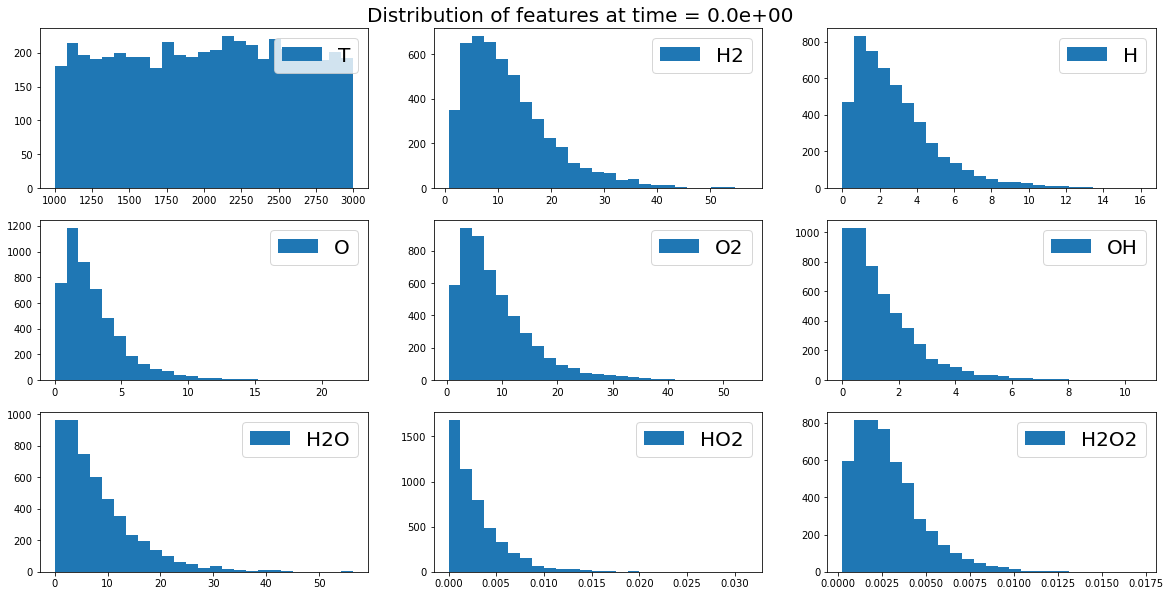

In [65]:
show_dist_time(0)

#### Observations
- The initial concentrations seem to have assumed a log-normal distribution despite generating molar fractions of H2O2 and HO2 from uniform distributions.
- Although concern has been raise about the generator for molar fraction of H2O2 being constant (approximately 1e-4), the distribution of initial concentration of H2O2 is not affected.

### Distribution of initial Pressure?

Although pressure is excluded in the dataset, pressure can be computed with ideal gas equation. Since we are dealing with unit volume, $P = nRT$, where $n$ is the total gas concentration.

In [53]:
n = data[:, 0, 1:].sum(dim = 1)
T = data[:, 0, 0]
R = 8.3145

In [54]:
P = n * R * T
P.shape

torch.Size([5000])

Text(0.5, 1.0, 'Distribution of initial pressure')

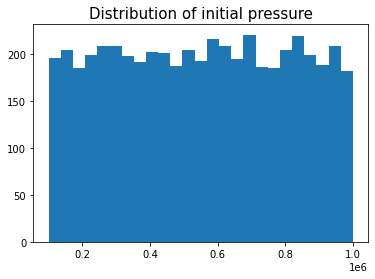

In [55]:
plt.hist(P.numpy(), bins = 25);
plt.title('Distribution of initial pressure', fontsize = 15)

#### Observation
Distribution of initial temperature and pressure is approximately uniform.

### Distribution of temperature and concentration at final timestep

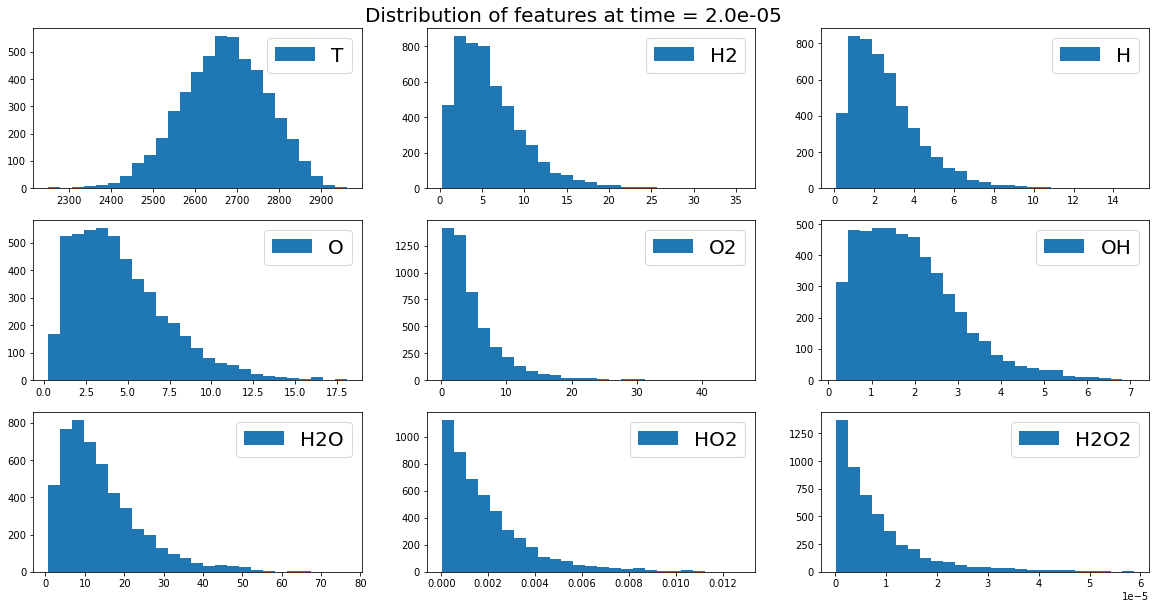

In [56]:
show_dist_time(200)

#### Observation
There has been significant alteration in the distribution. E.g. Distribution of temperature changed from uniform to normal. It is interesting to look closely at dynamics of these distribution across each feature.

### Distributions over time

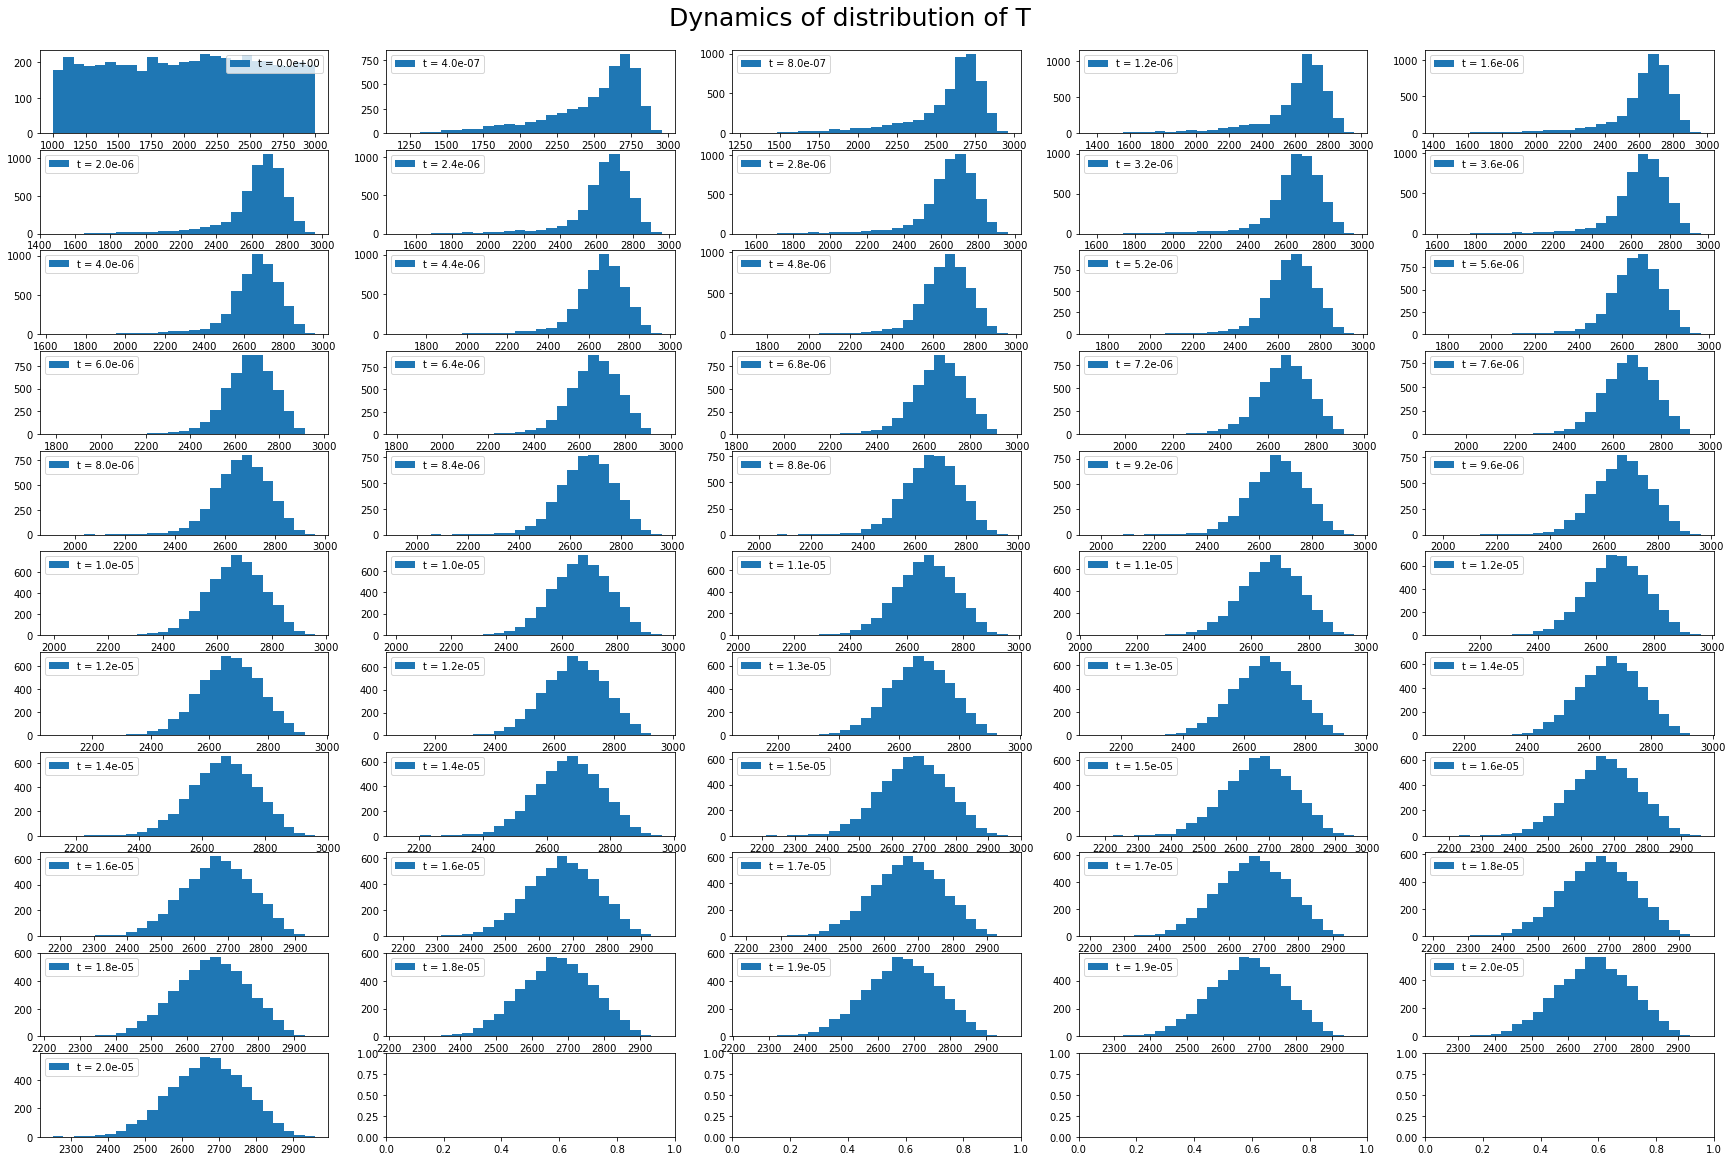

In [66]:
show_dist_comp(0, 0, 201, 4, (30,20))

#### Distribution of temperature quickly assumed a distribution skewed to the left in the early stage of chemical combustion, the distribution later lost its skewness. Also, the temperature range became from about 2300 to over 2900K. Next is the observation of distribution of the concentrations

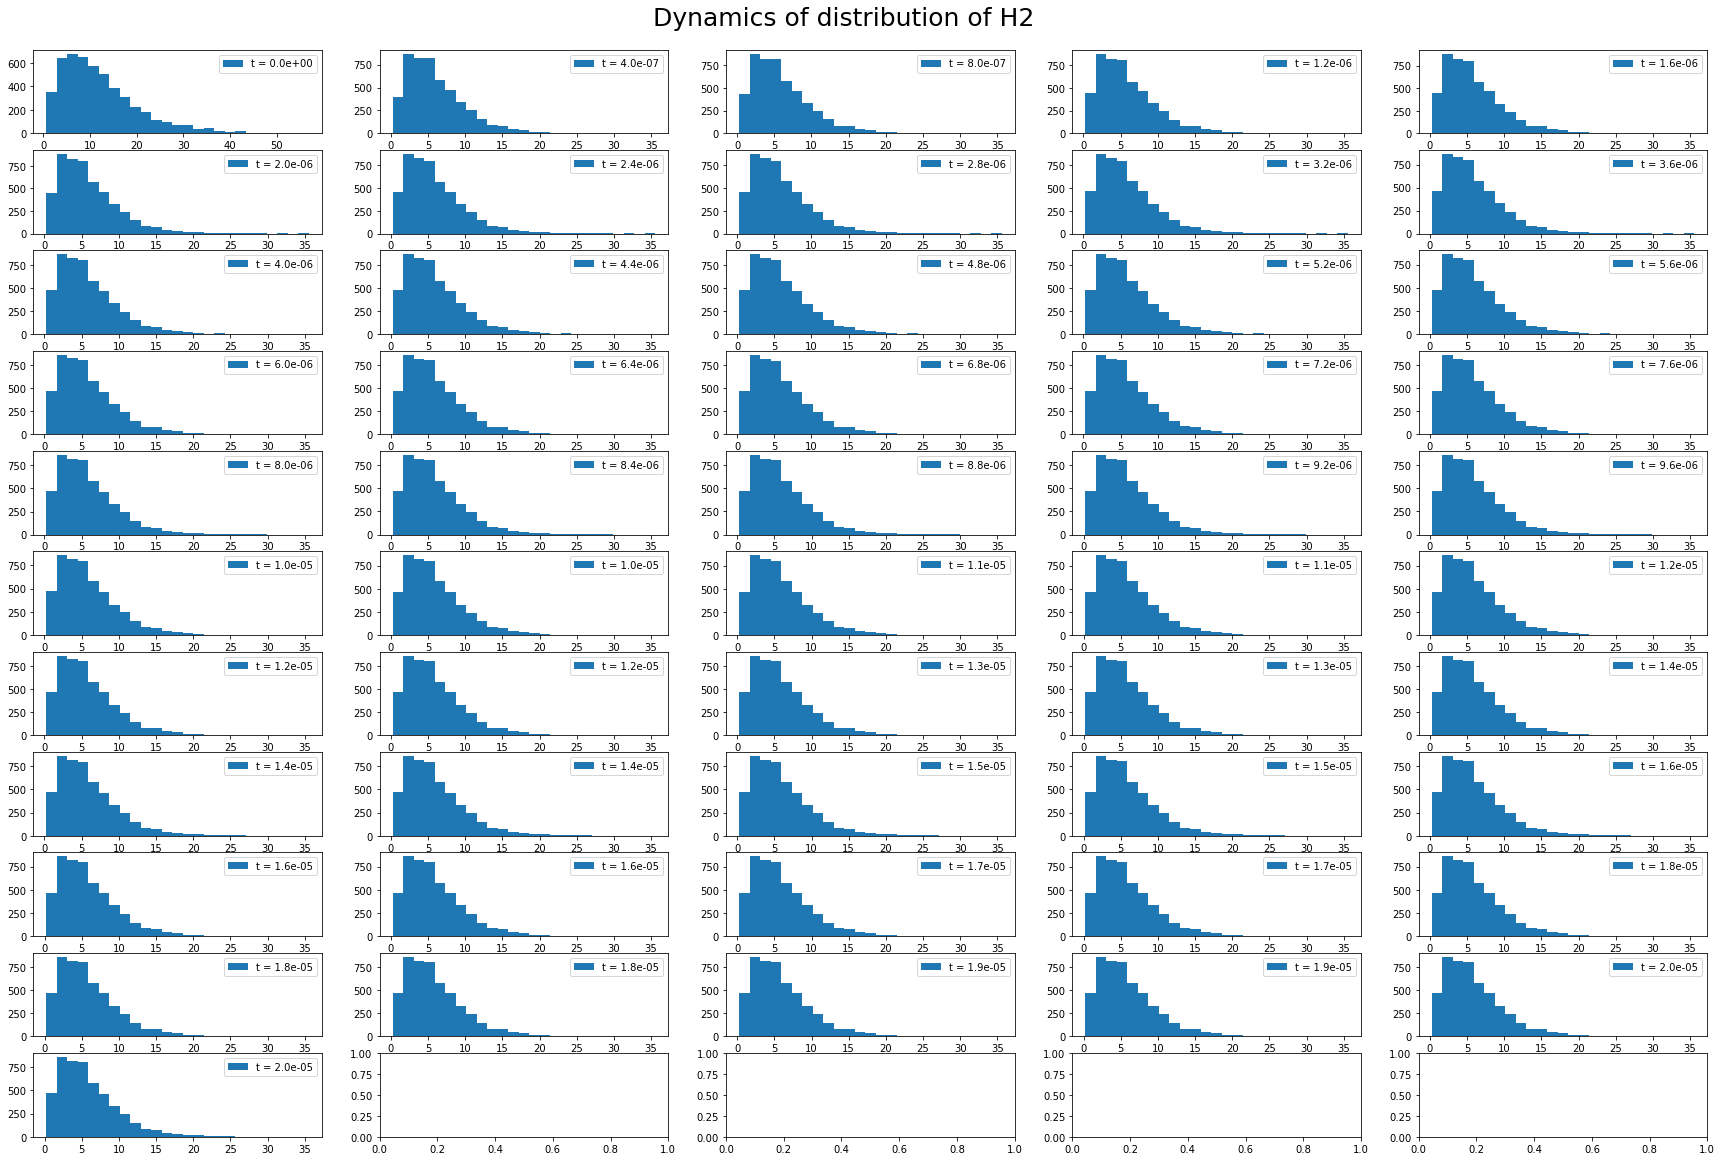

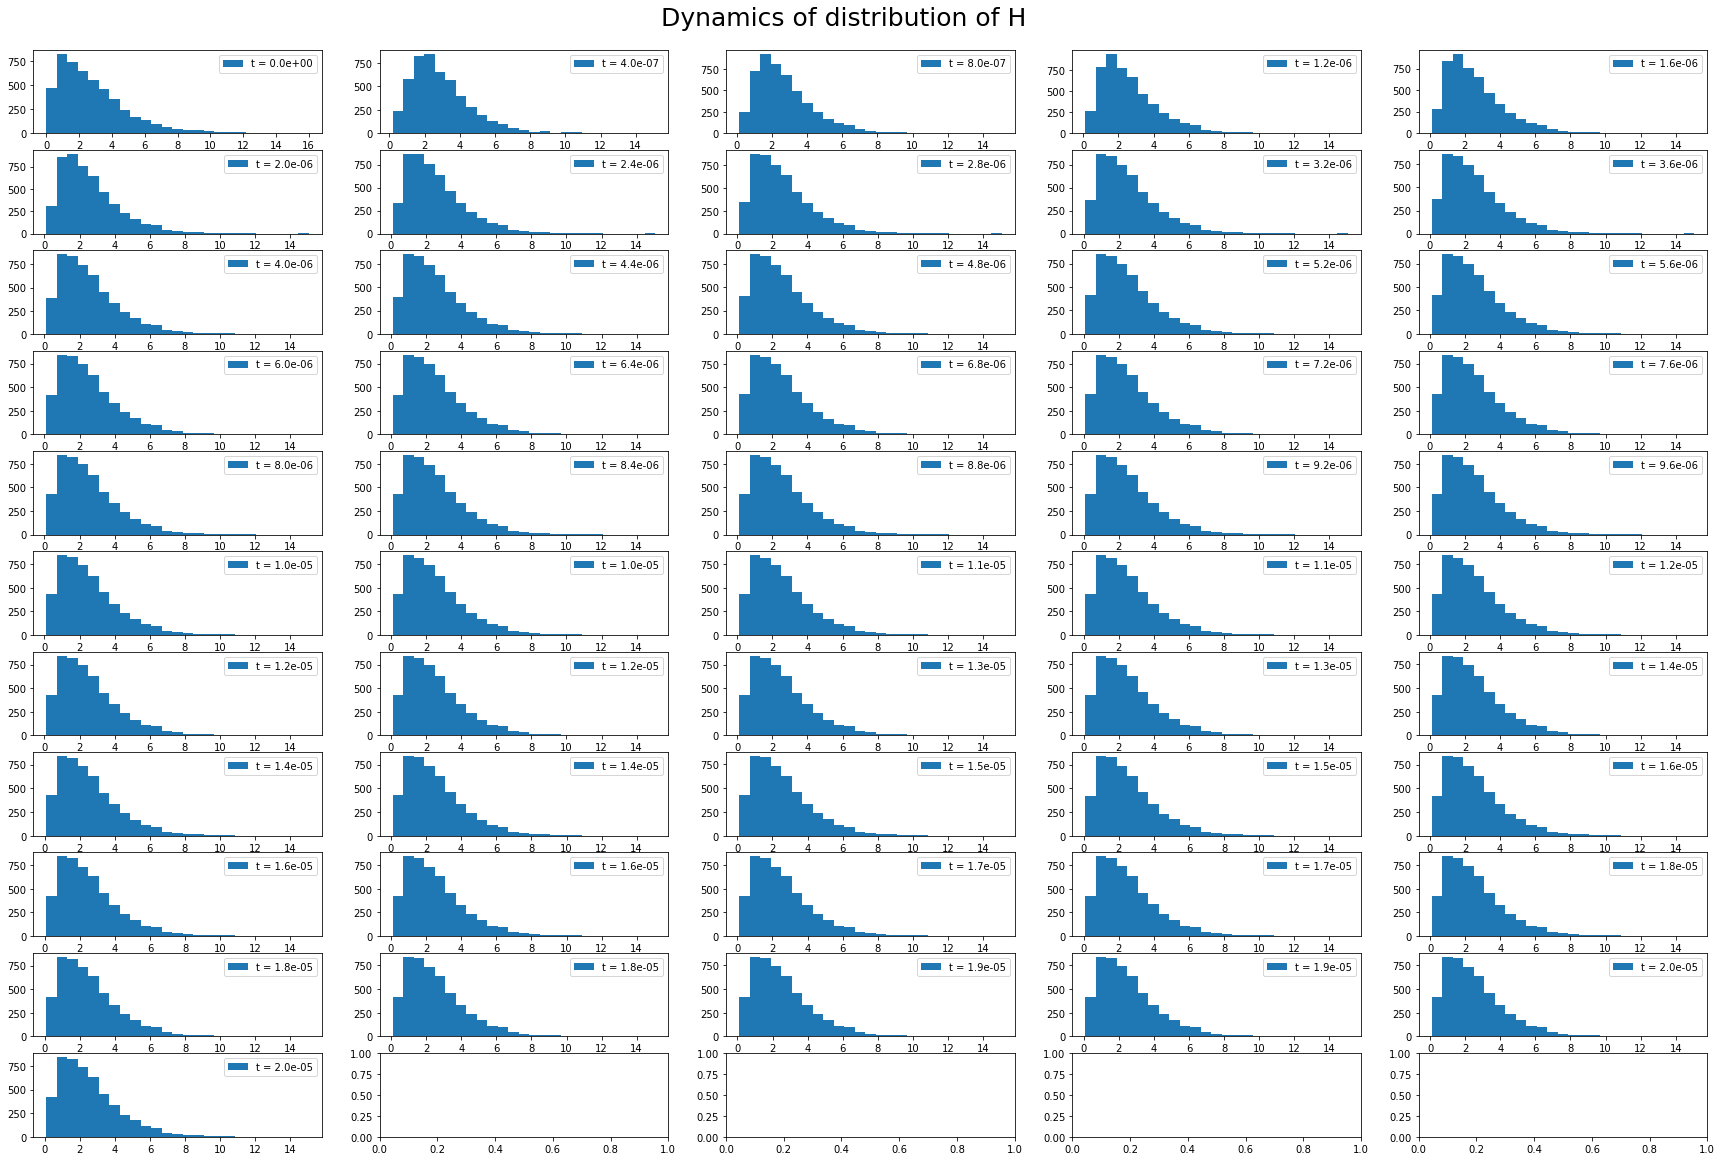

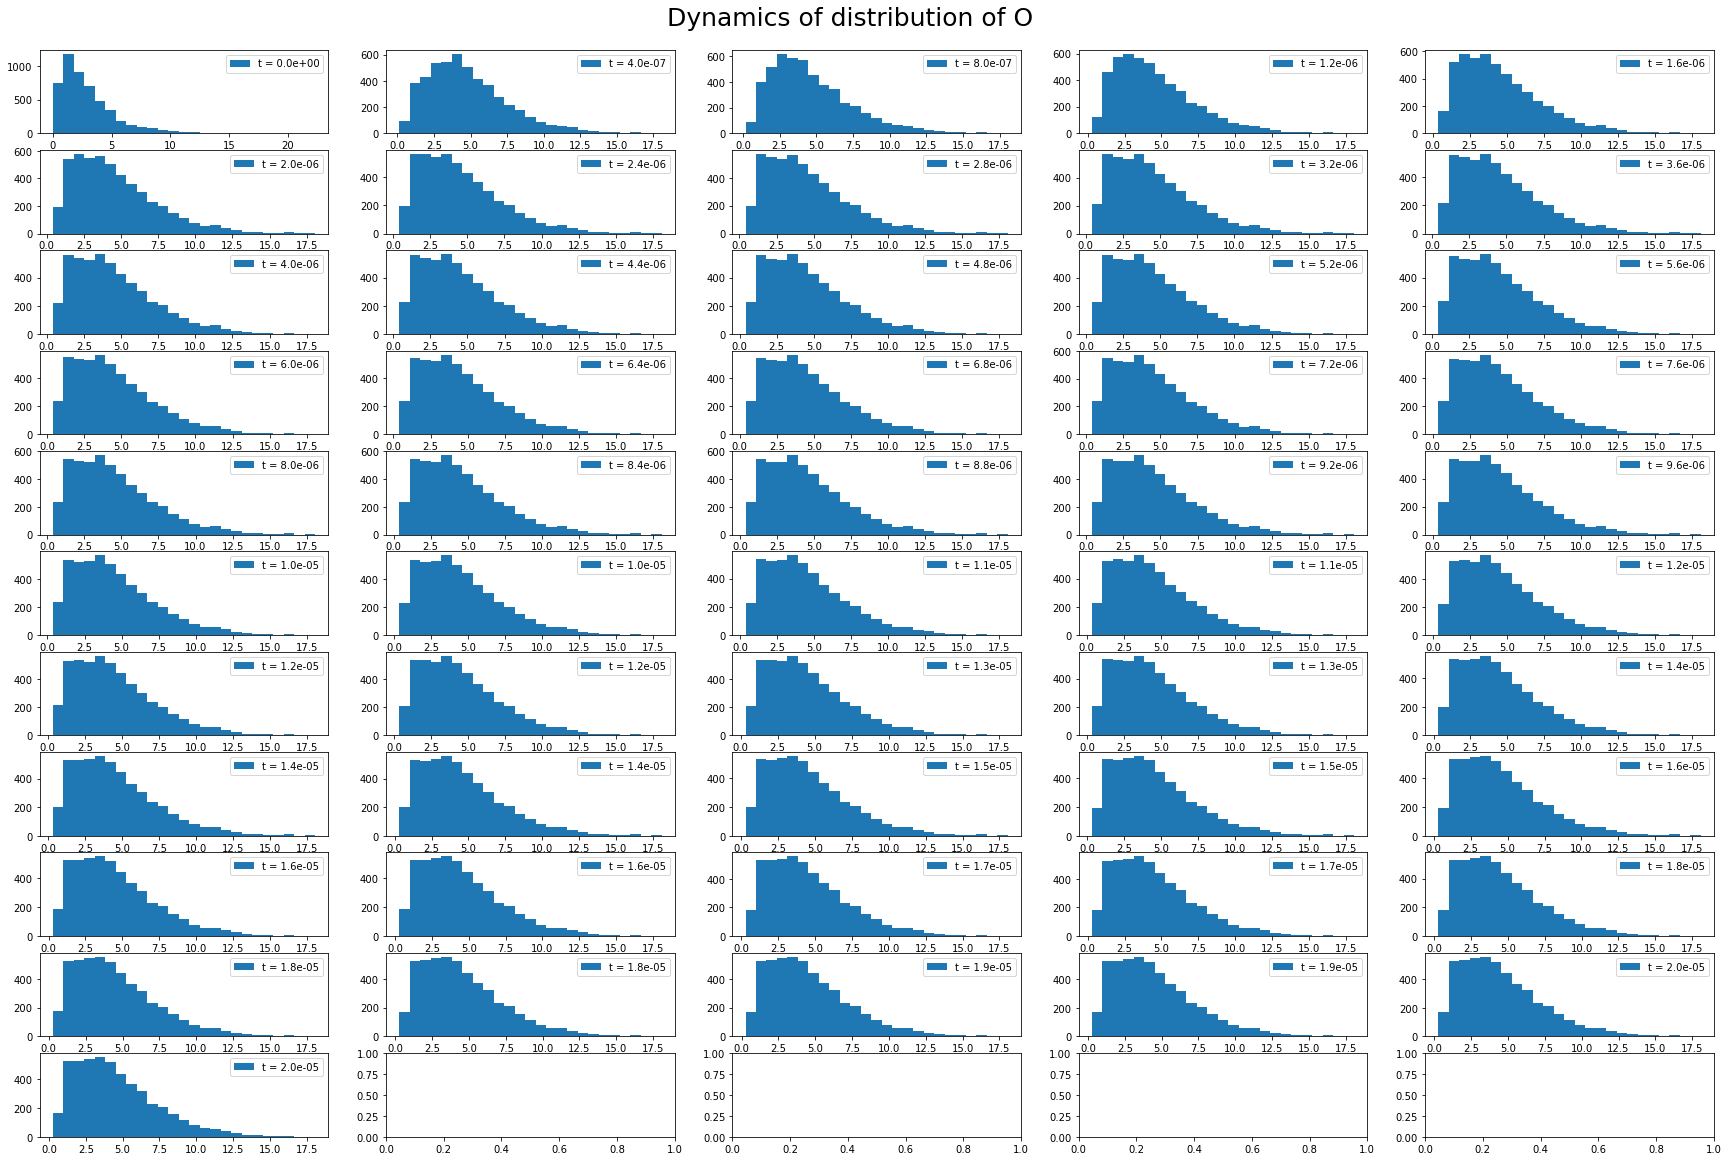

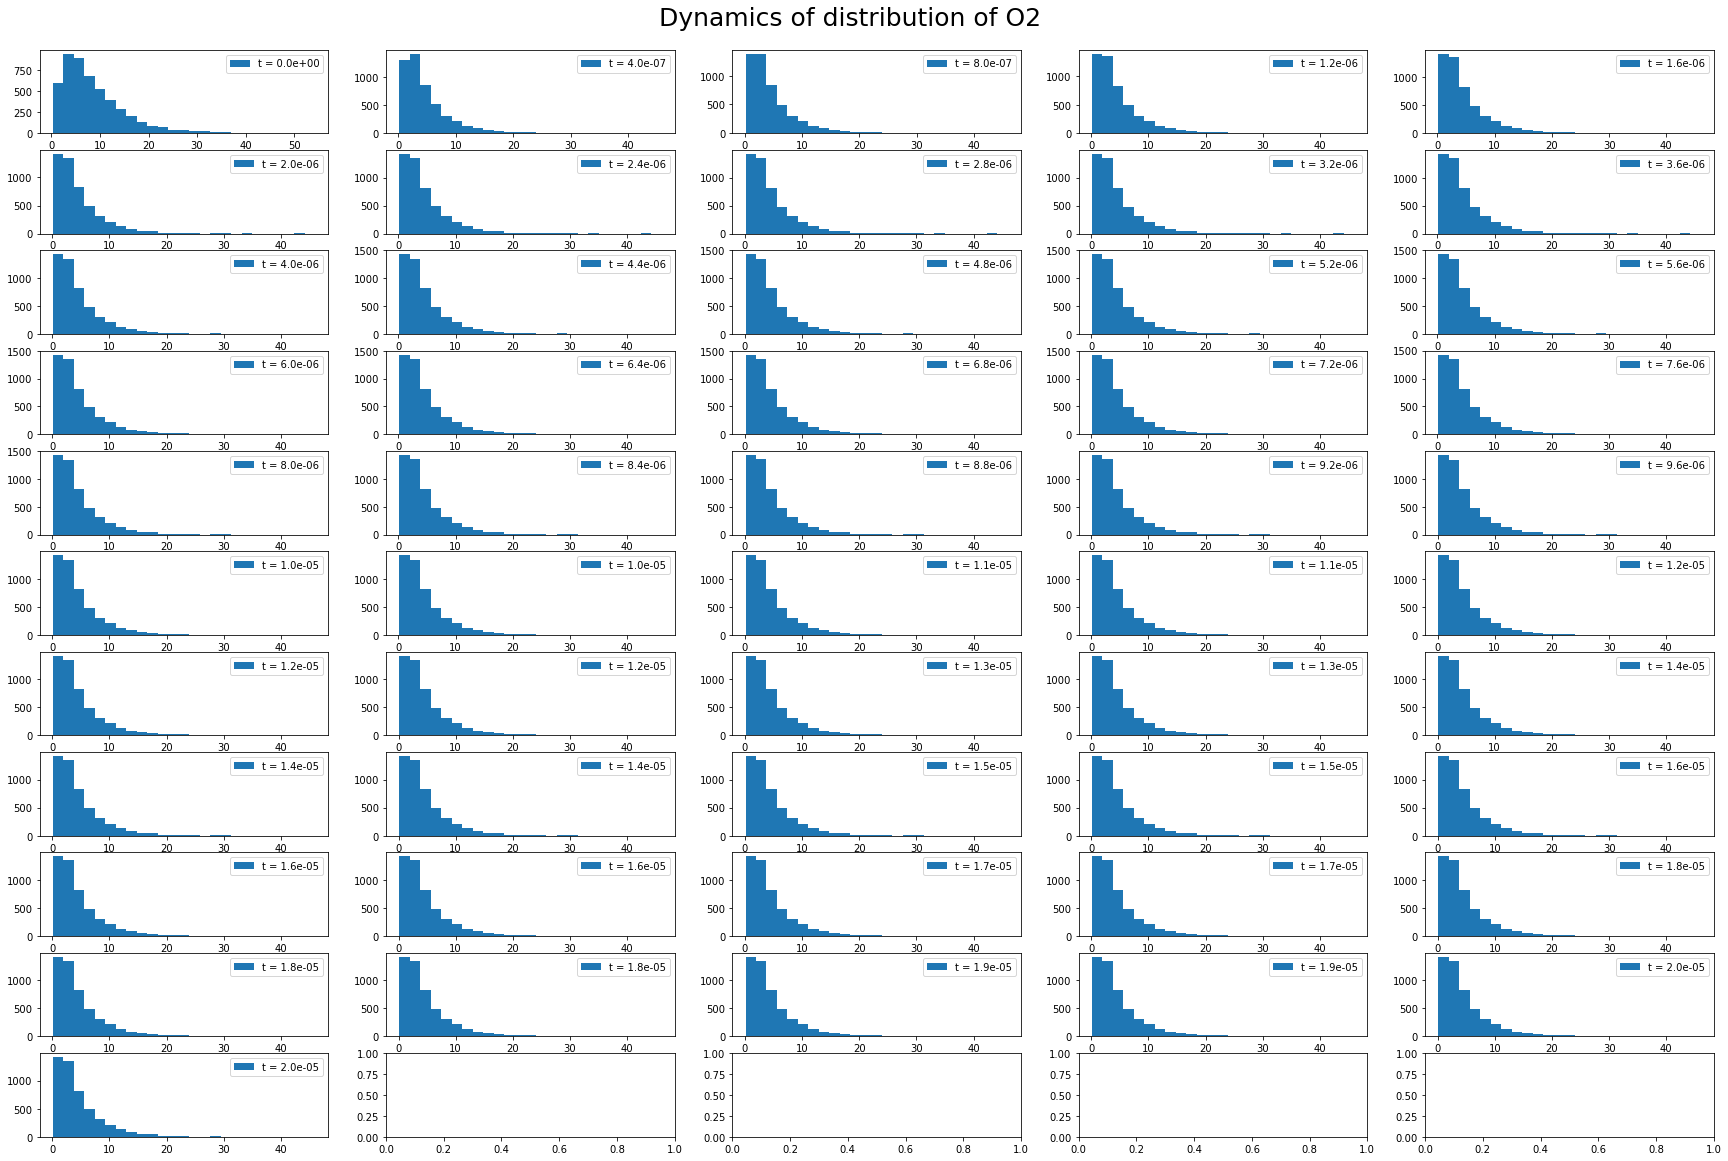

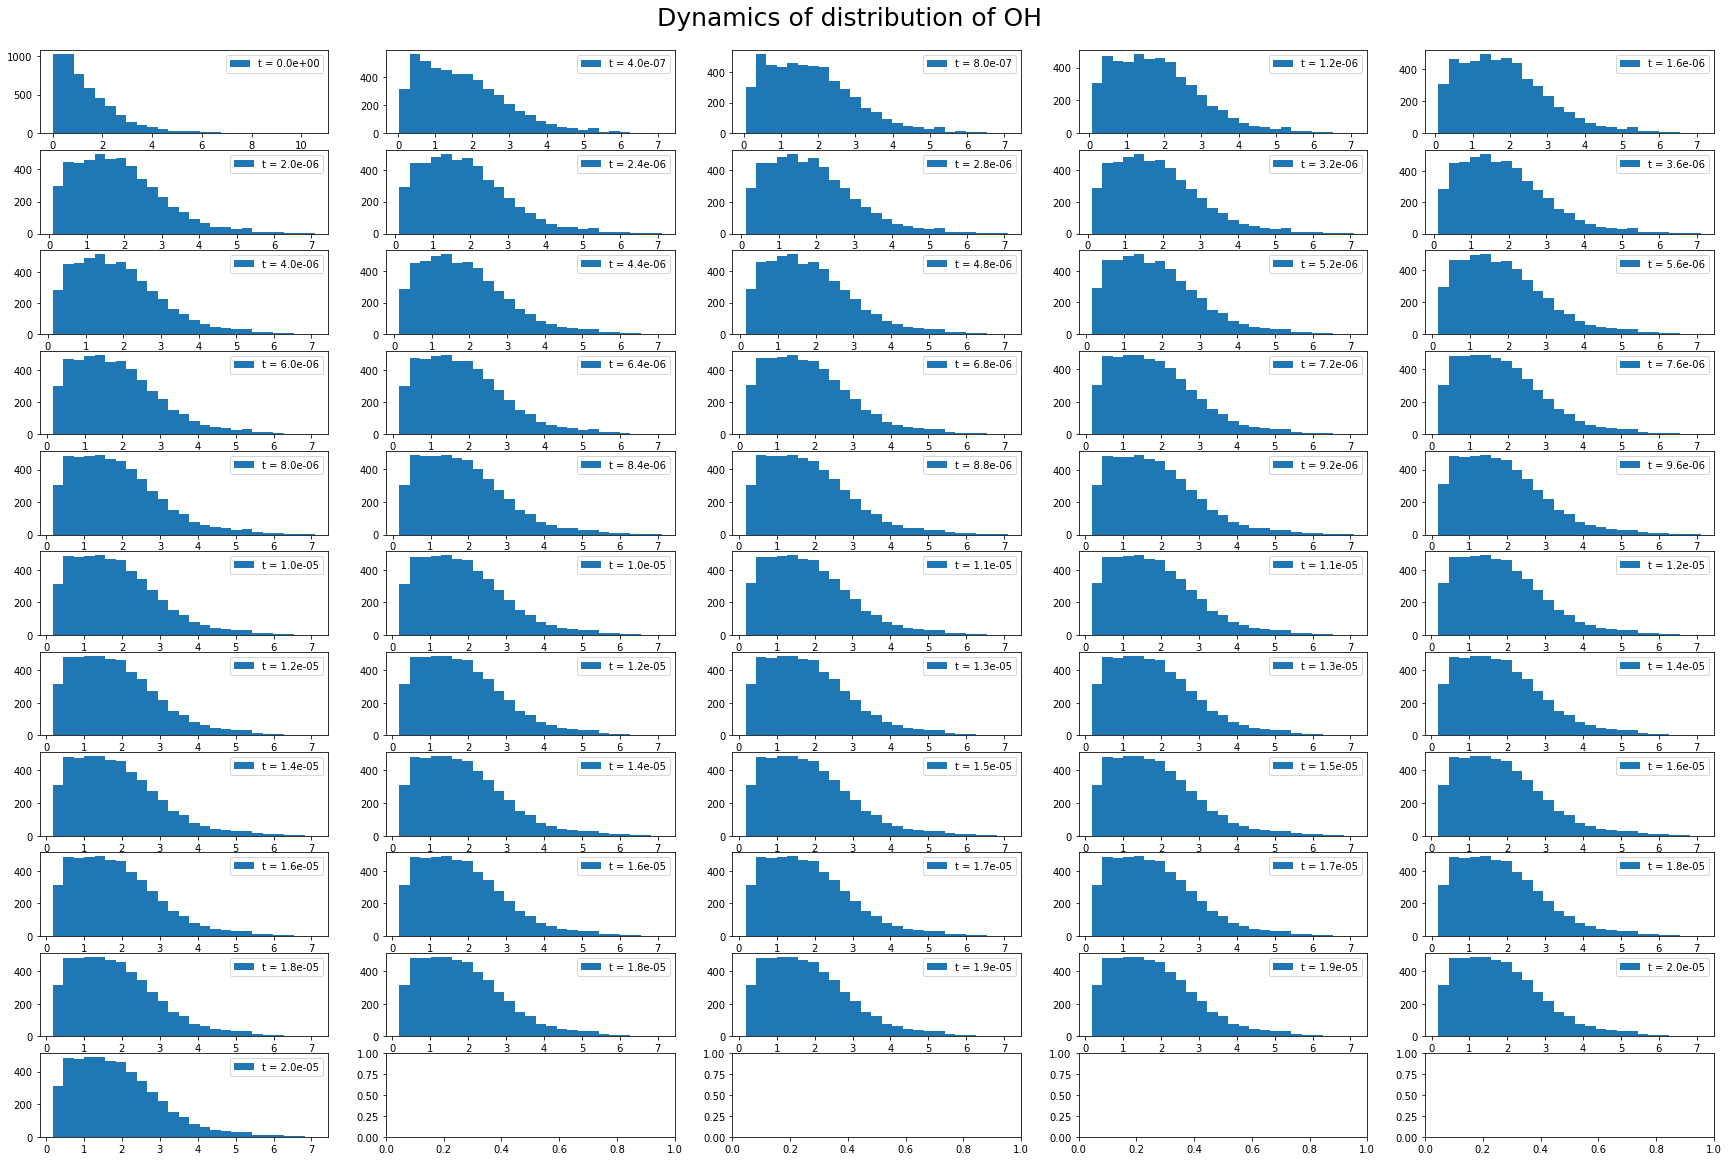

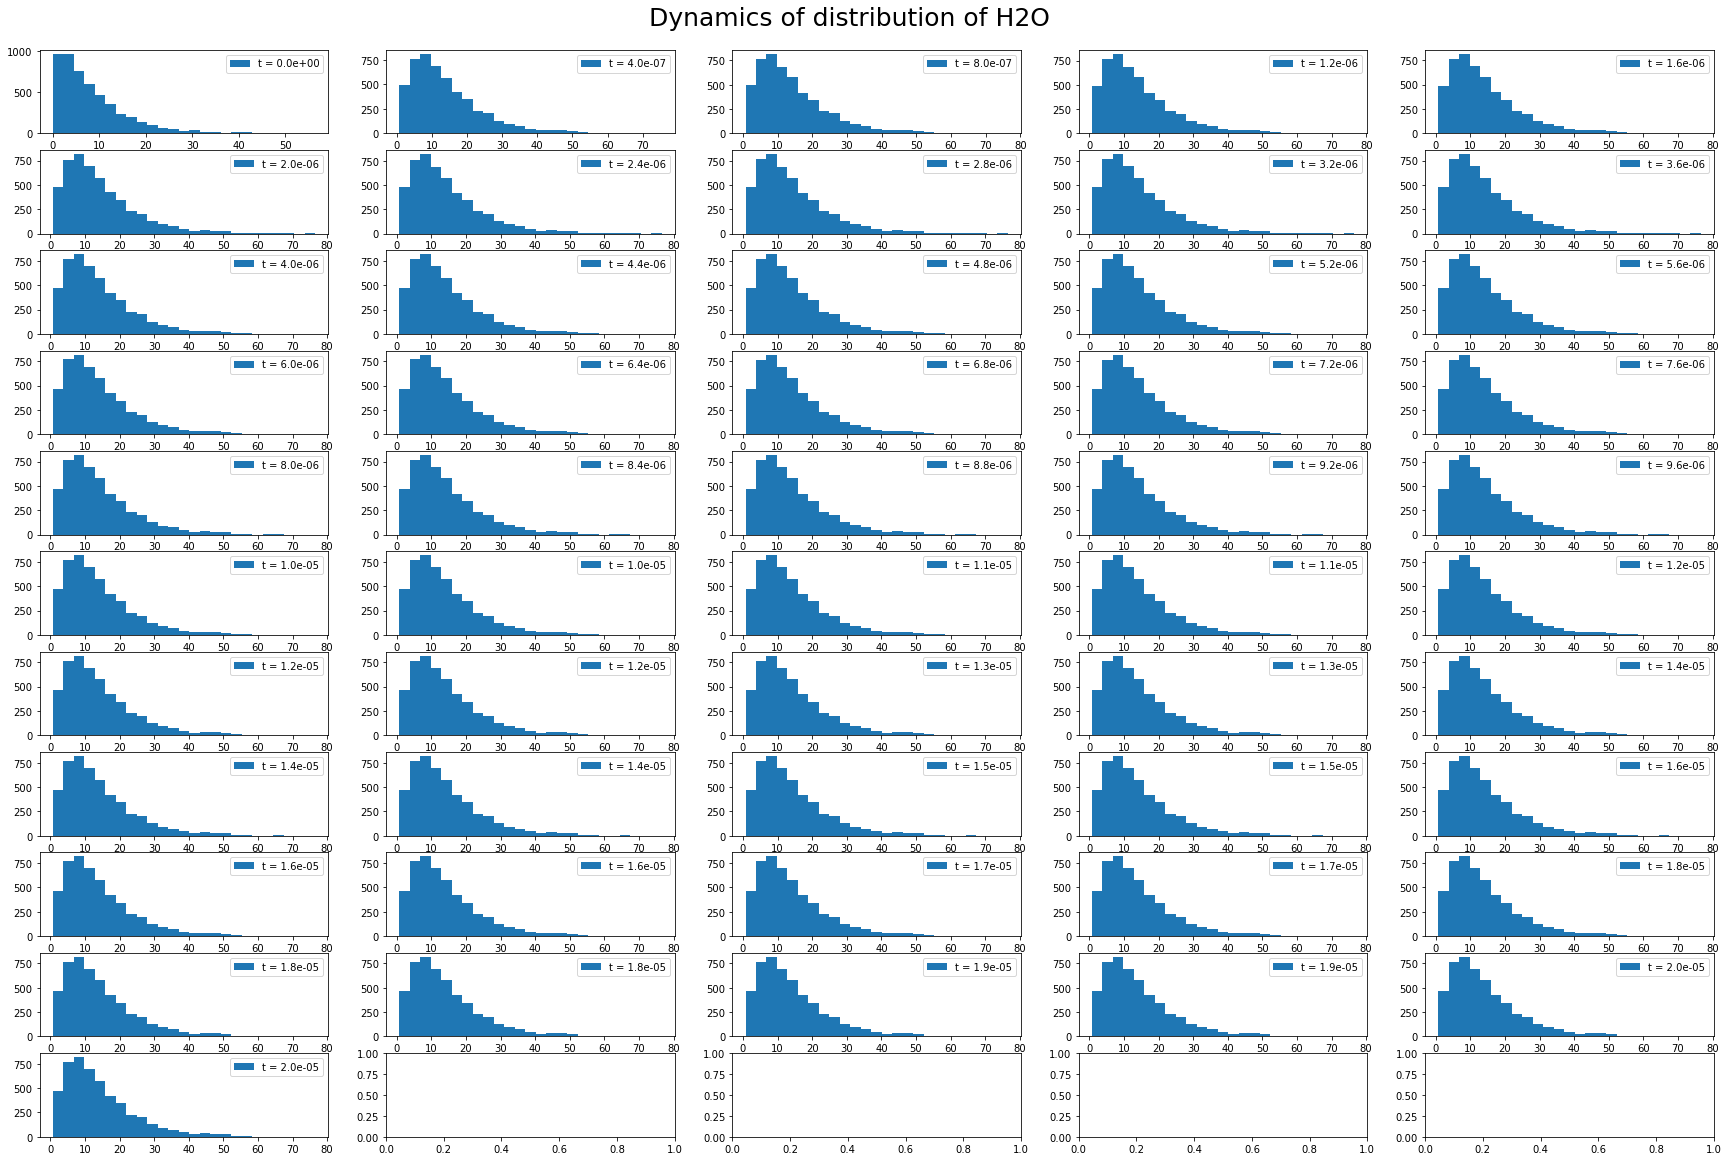

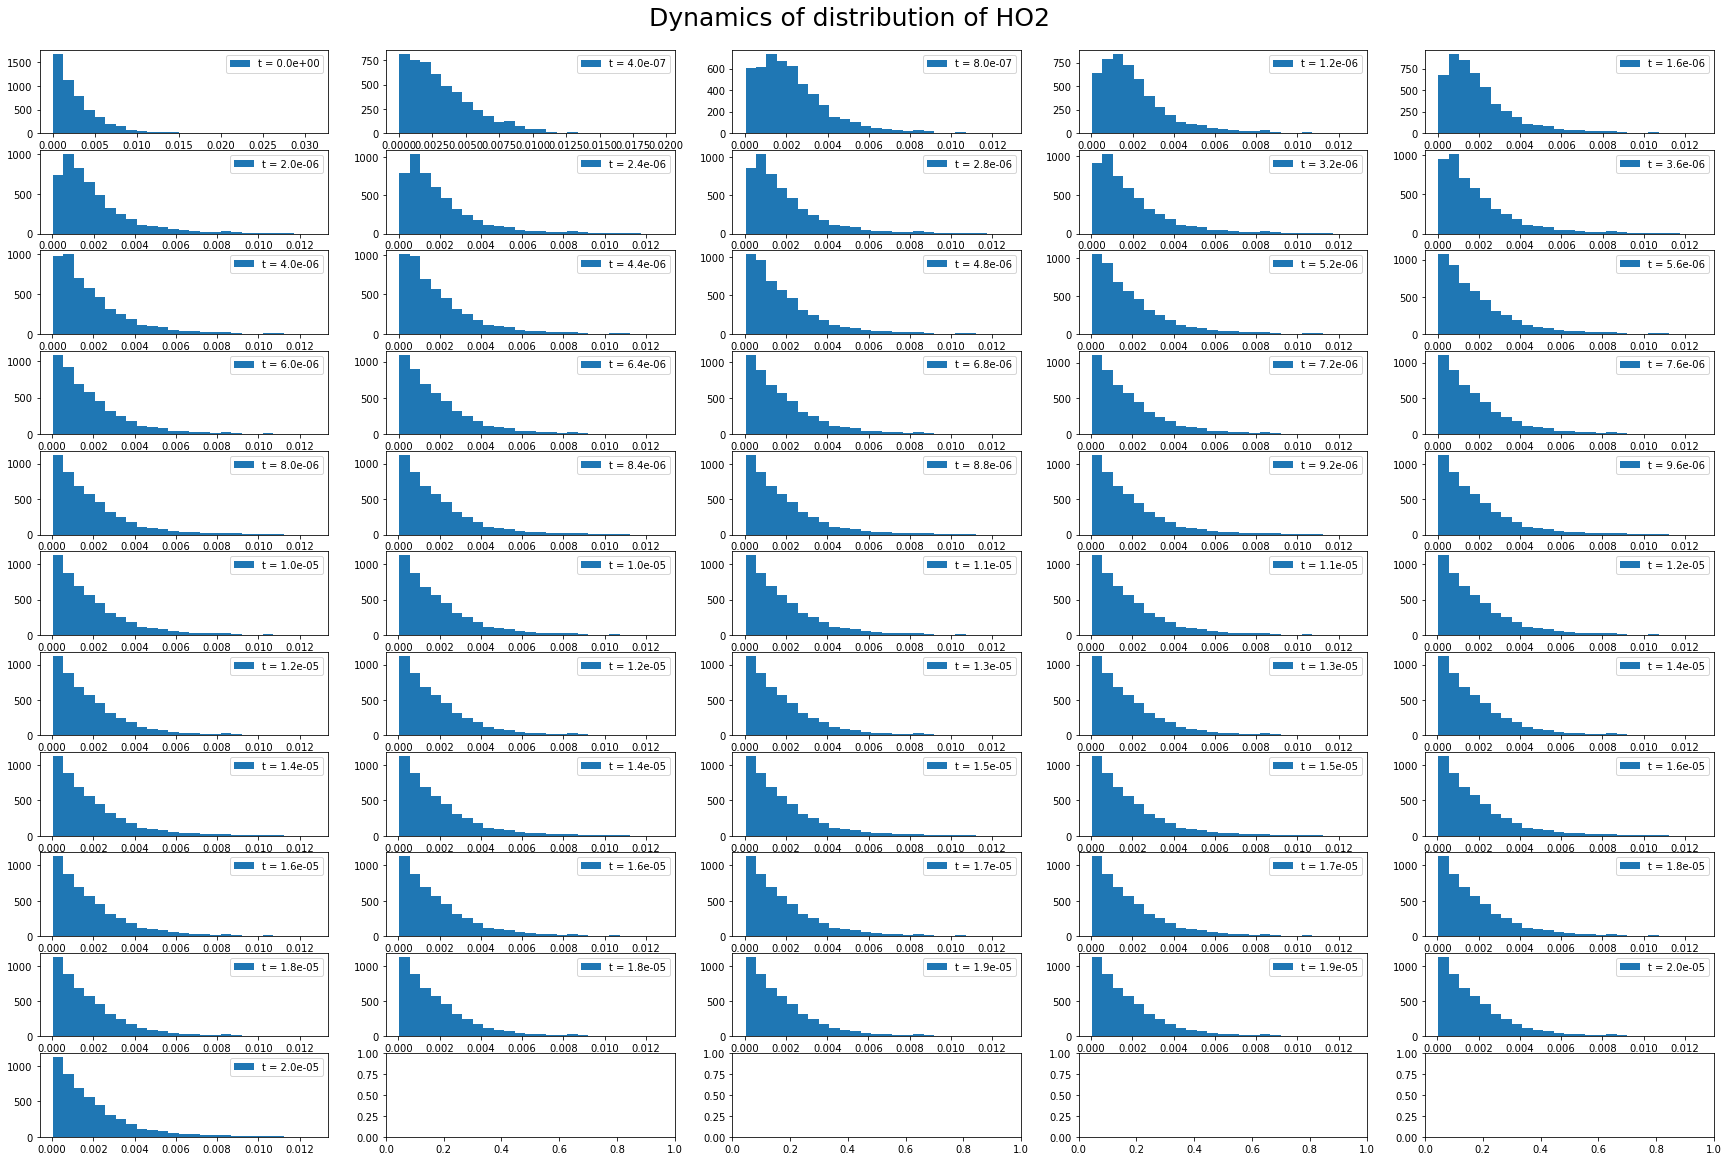

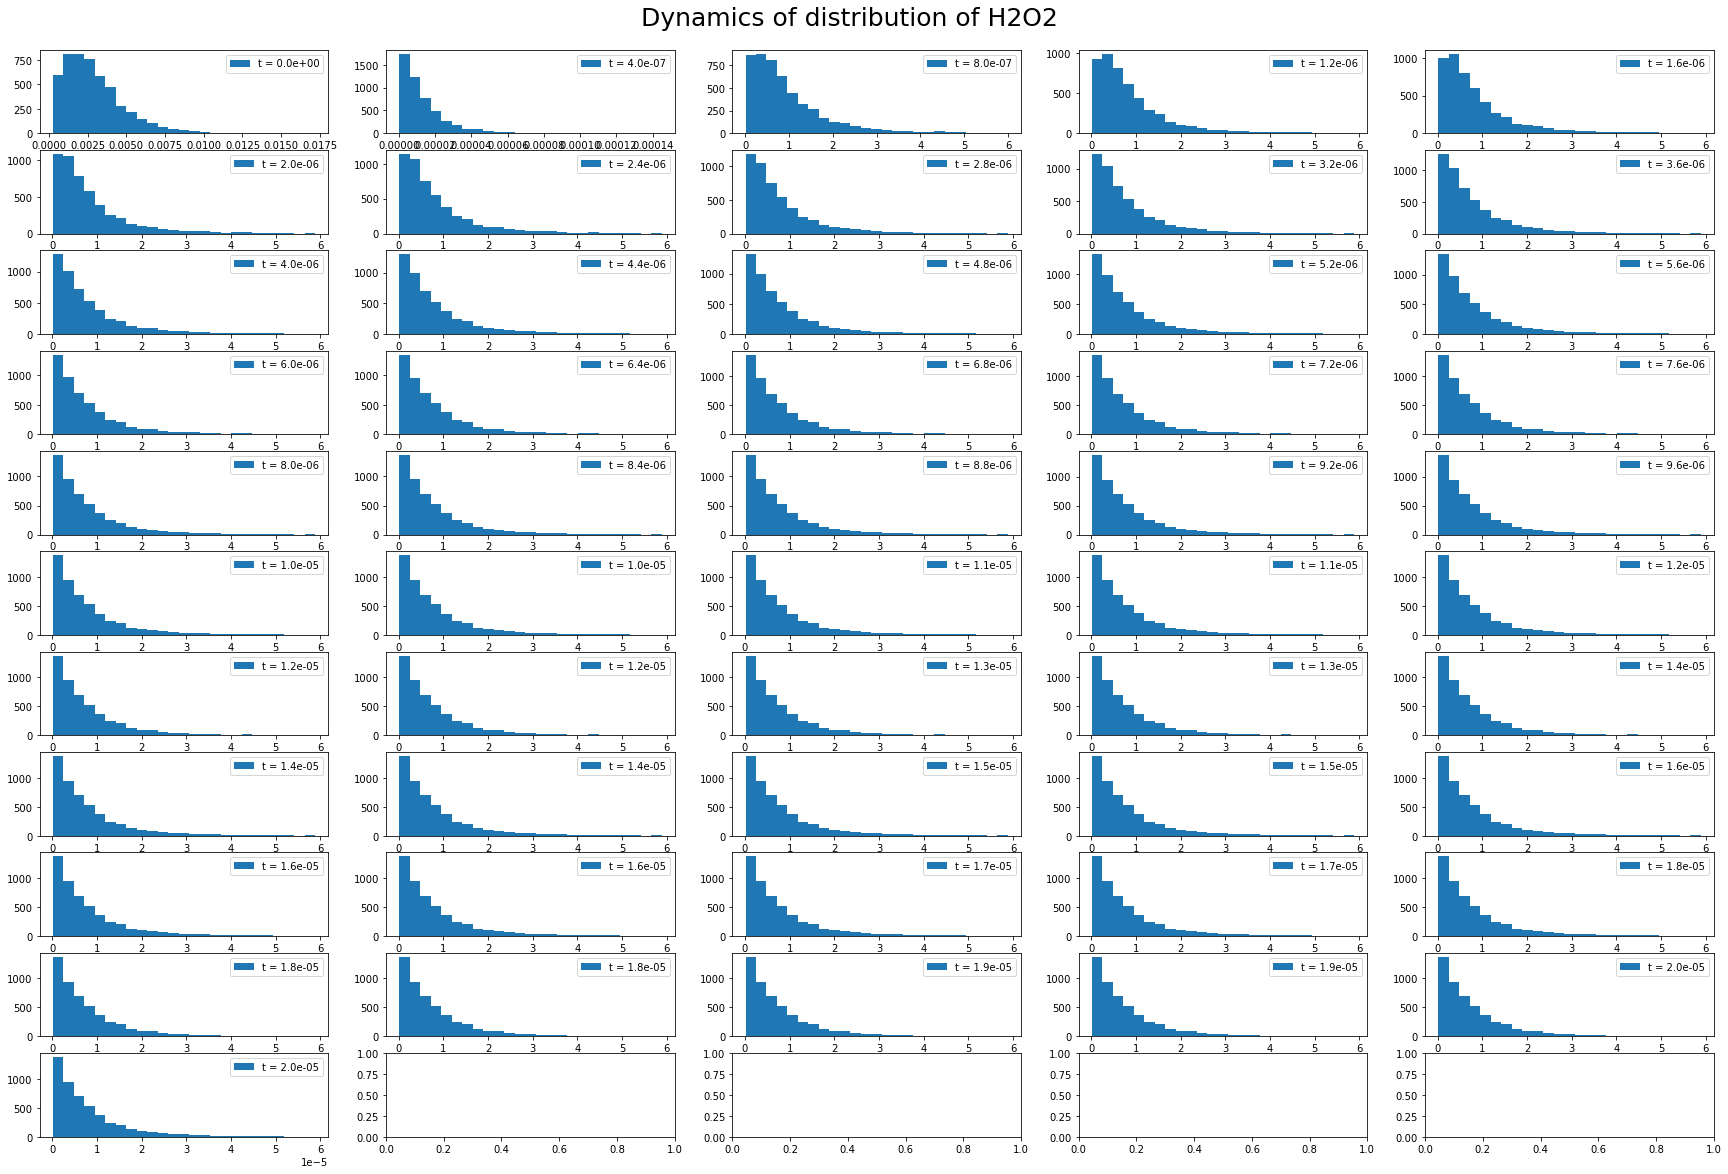

In [77]:
for i in range(1,9):
    show_dist_comp(i, 0, 201, 4, (30,20))

- Most concentration maintained log-normal distribution
- The components consisting of oxygen seem to have experienced more changes in distribution.

## Crossplots
Next is to look out for possibilities of 'obvious dependencies' between the features

### Crossplot over time
Starting with consideration of dynamic dependencies... 

In [139]:
def show_scatter(x,y):
    '''
    ::: Usage :::
    Cross plot visualization of relationship between selected features x and y over fixed time.
    '''
    fig = plt.figure(figsize = (20,15))
    ax = plt.subplot(331)
    ax.scatter(data[:, 0, x], data[:, 0, y], alpha = 0.2, label = 't = {}'.format(0 * 1e-7))
    ax.legend(fontsize = 15)
    ax = plt.subplot(332)
    ax.scatter(data[:, 10, x], data[:,10, y], alpha = 0.2, label = 't = {}'.format(10 * 1e-7))
    ax.legend(fontsize = 15)
    ax = plt.subplot(333)
    ax.scatter(data[:, 25, x], data[:, 25, y], alpha = 0.2, label = 't = {:.1e}'.format(25 * 1e-7))
    ax.legend(fontsize = 15)
    ax = plt.subplot(334)
    ax.scatter(data[:, 50, x], data[:, 50, y], alpha = 0.2, label = 't = {:.1e}'.format(50 * 1e-7))
    ax.legend(fontsize = 15)
    ax = plt.subplot(335)
    ax.scatter(data[:, 100, x], data[:, 100, y], alpha = 0.2, label = 't = {:.1e}'.format(100 * 1e-7))
    ax.legend(fontsize = 15)
    ax = plt.subplot(336)
    ax.scatter(data[:, 200, x], data[:, 200, y], alpha = 0.2, label = 't = {:.1e}'.format(200 * 1e-7))
    ax.legend(fontsize = 15)
    tags = ["Temp",  'C_{H2}', 'C_{H}', 'C_{O}', 'C_{O2}', 'C_{OH}', 'C_{H2O}',  'C_{HO2}',  'C_{H2O2}']
    plt.suptitle(f'${tags[y]}$ against ${tags[x]}$', y = 0.92, fontsize = 25);
    fig.supxlabel(f'${tags[x]}$', y = 0.35, fontsize = 20)
    fig.supylabel(f'${tags[y]}$', x = 0.1, y = 0.65, fontsize = 20)

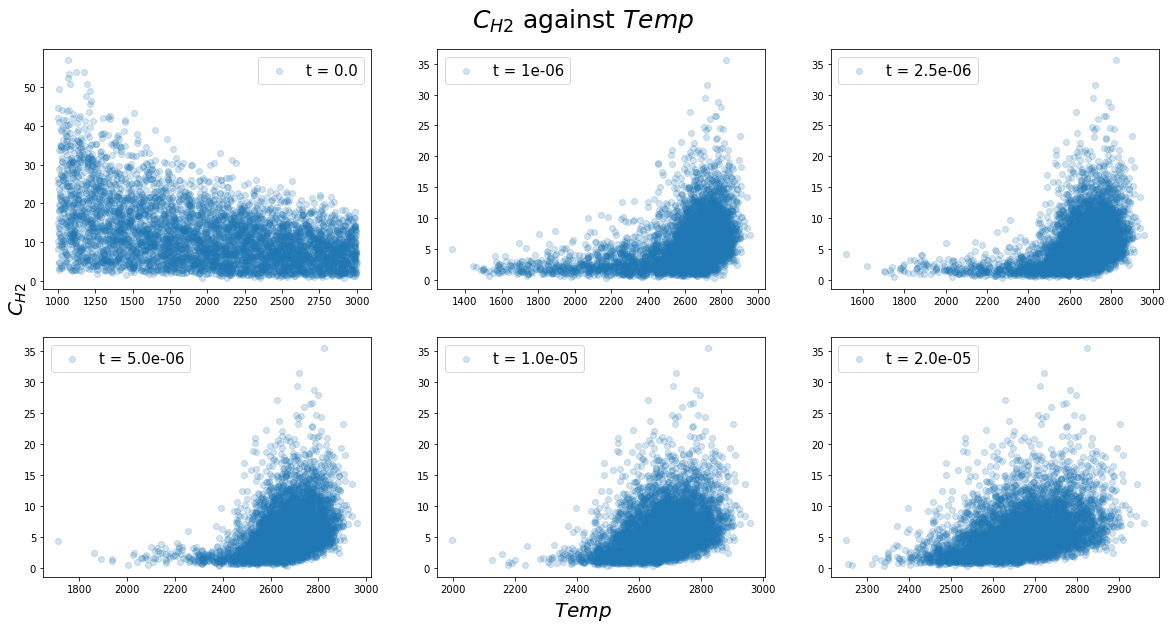

In [140]:
show_scatter(0,1)

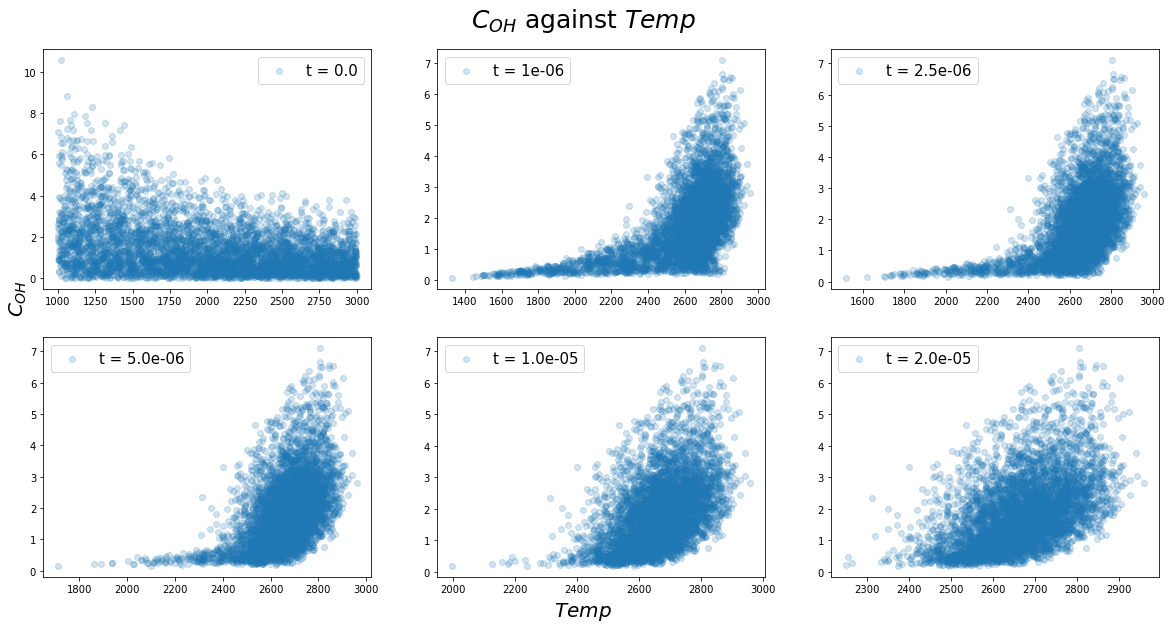

In [141]:
show_scatter(0,5)

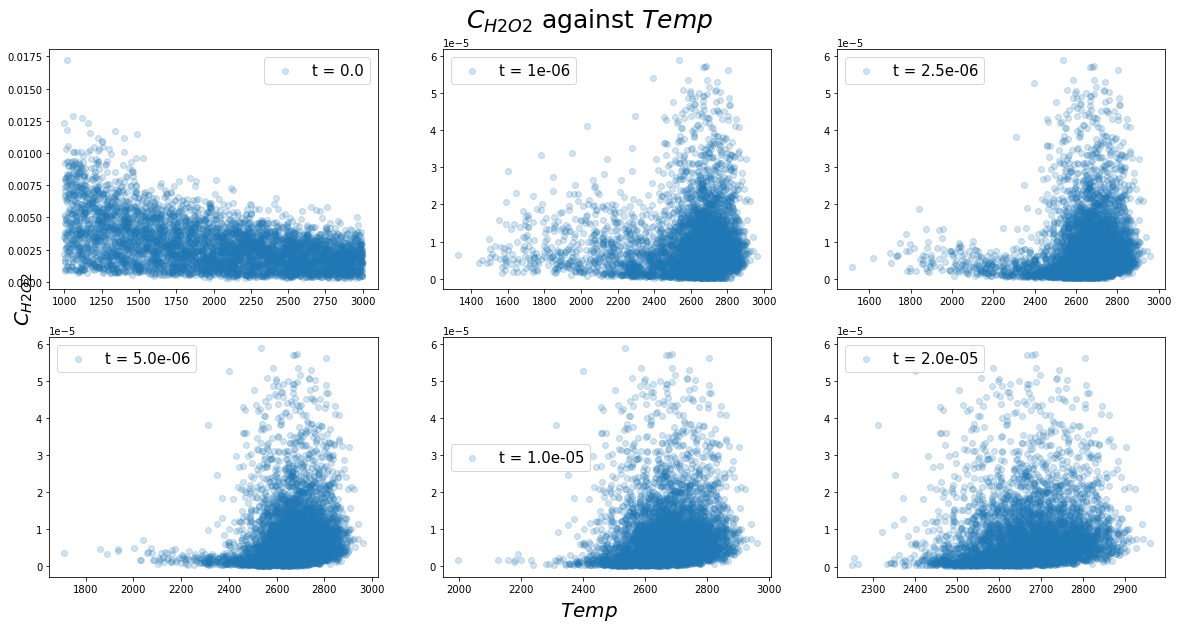

In [142]:
show_scatter(0,8)

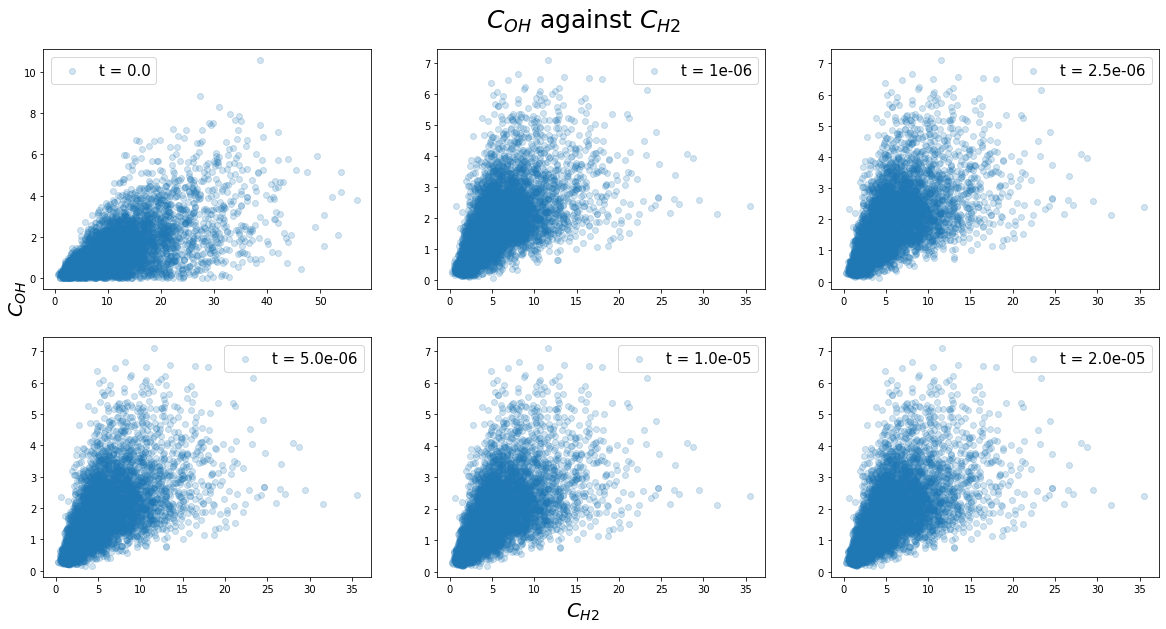

In [143]:
show_scatter(1,5)

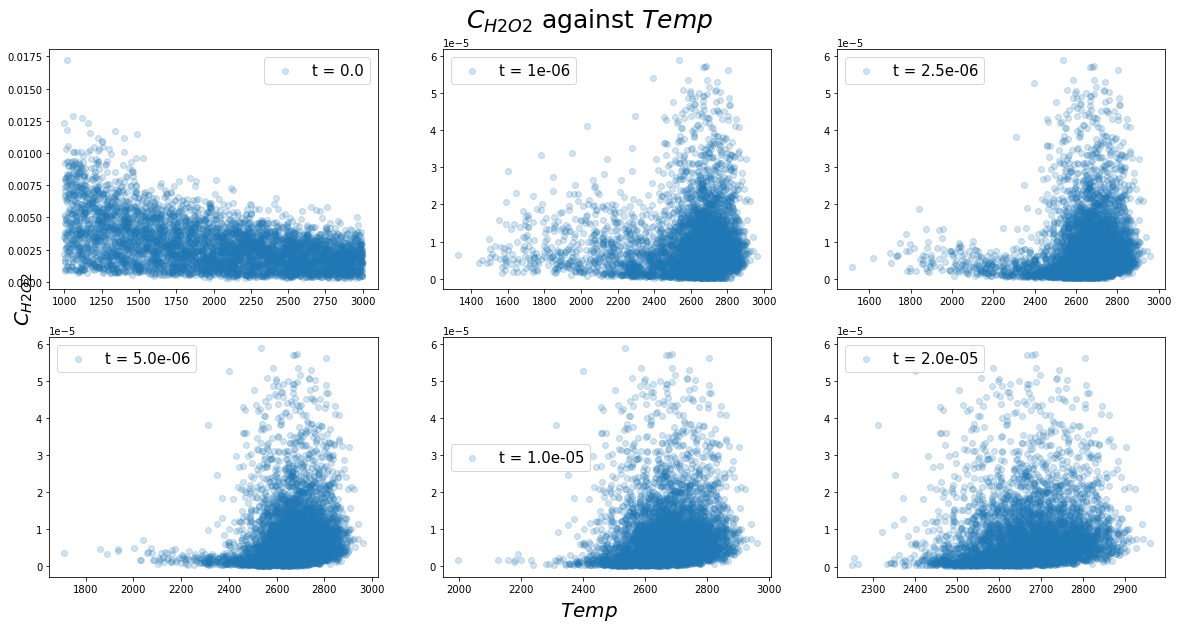

In [144]:
show_scatter(0,-1)

### Cross plot over all features at fixed time

In [145]:
import pandas as pd

In [150]:
class Flexlist(list):
    def __getitem__(self, keys):
        if isinstance(keys, (int, slice)): return list.__getitem__(self, keys)
        return [self[k] for k in keys]
    
def show_scatter_time(column_indices = 'all', time = 0):
    '''
    :::Usage::::
    Cross Plot Visualization over features at fixed time.
    
    column_indices:: list of (atleast 2) feature indices or string 'all' to plot for all columns. default = 'all'
    time:: -1 or int. Timestep to plot. -1 is the last time step. Default = 0
    '''
    tags = Flexlist(["T",  'H2', 'H', 'O', 'O2', 'OH', 'H2O',  'HO2',  'H2O2'])
    cols = tags[column_indices] if column_indices != 'all' else tags
    t = 200 if time == -1 else time
    if column_indices == 'all':
        pd.plotting.scatter_matrix(pd.DataFrame(data[:, time, :].numpy(), columns = cols), alpha = 0.3, figsize = (30,30));
        plt.suptitle('Scatter matrix for all features at t = {:.1e}'.format(t * 1e-7), x = 0.5, y = 0.9, fontsize = 30);
    else:
        pd.plotting.scatter_matrix(pd.DataFrame(data[:, time, column_indices].numpy(), columns = cols), alpha = 0.3, figsize = (4 * len(cols), 4 * len(cols)));
        # plt.suptitle(f'Scatter matrix of {cols} at t = {t * 1e-7}',x = 0.5, y = 0.91, fontsize = 30);
        plt.suptitle('Scatter matrix for {} at t = {:.1e}'.format(cols, t * 1e-7), x = 0.5, y = 0.92, fontsize = 30);

#### Cross plot across initial concentrations and temperature.

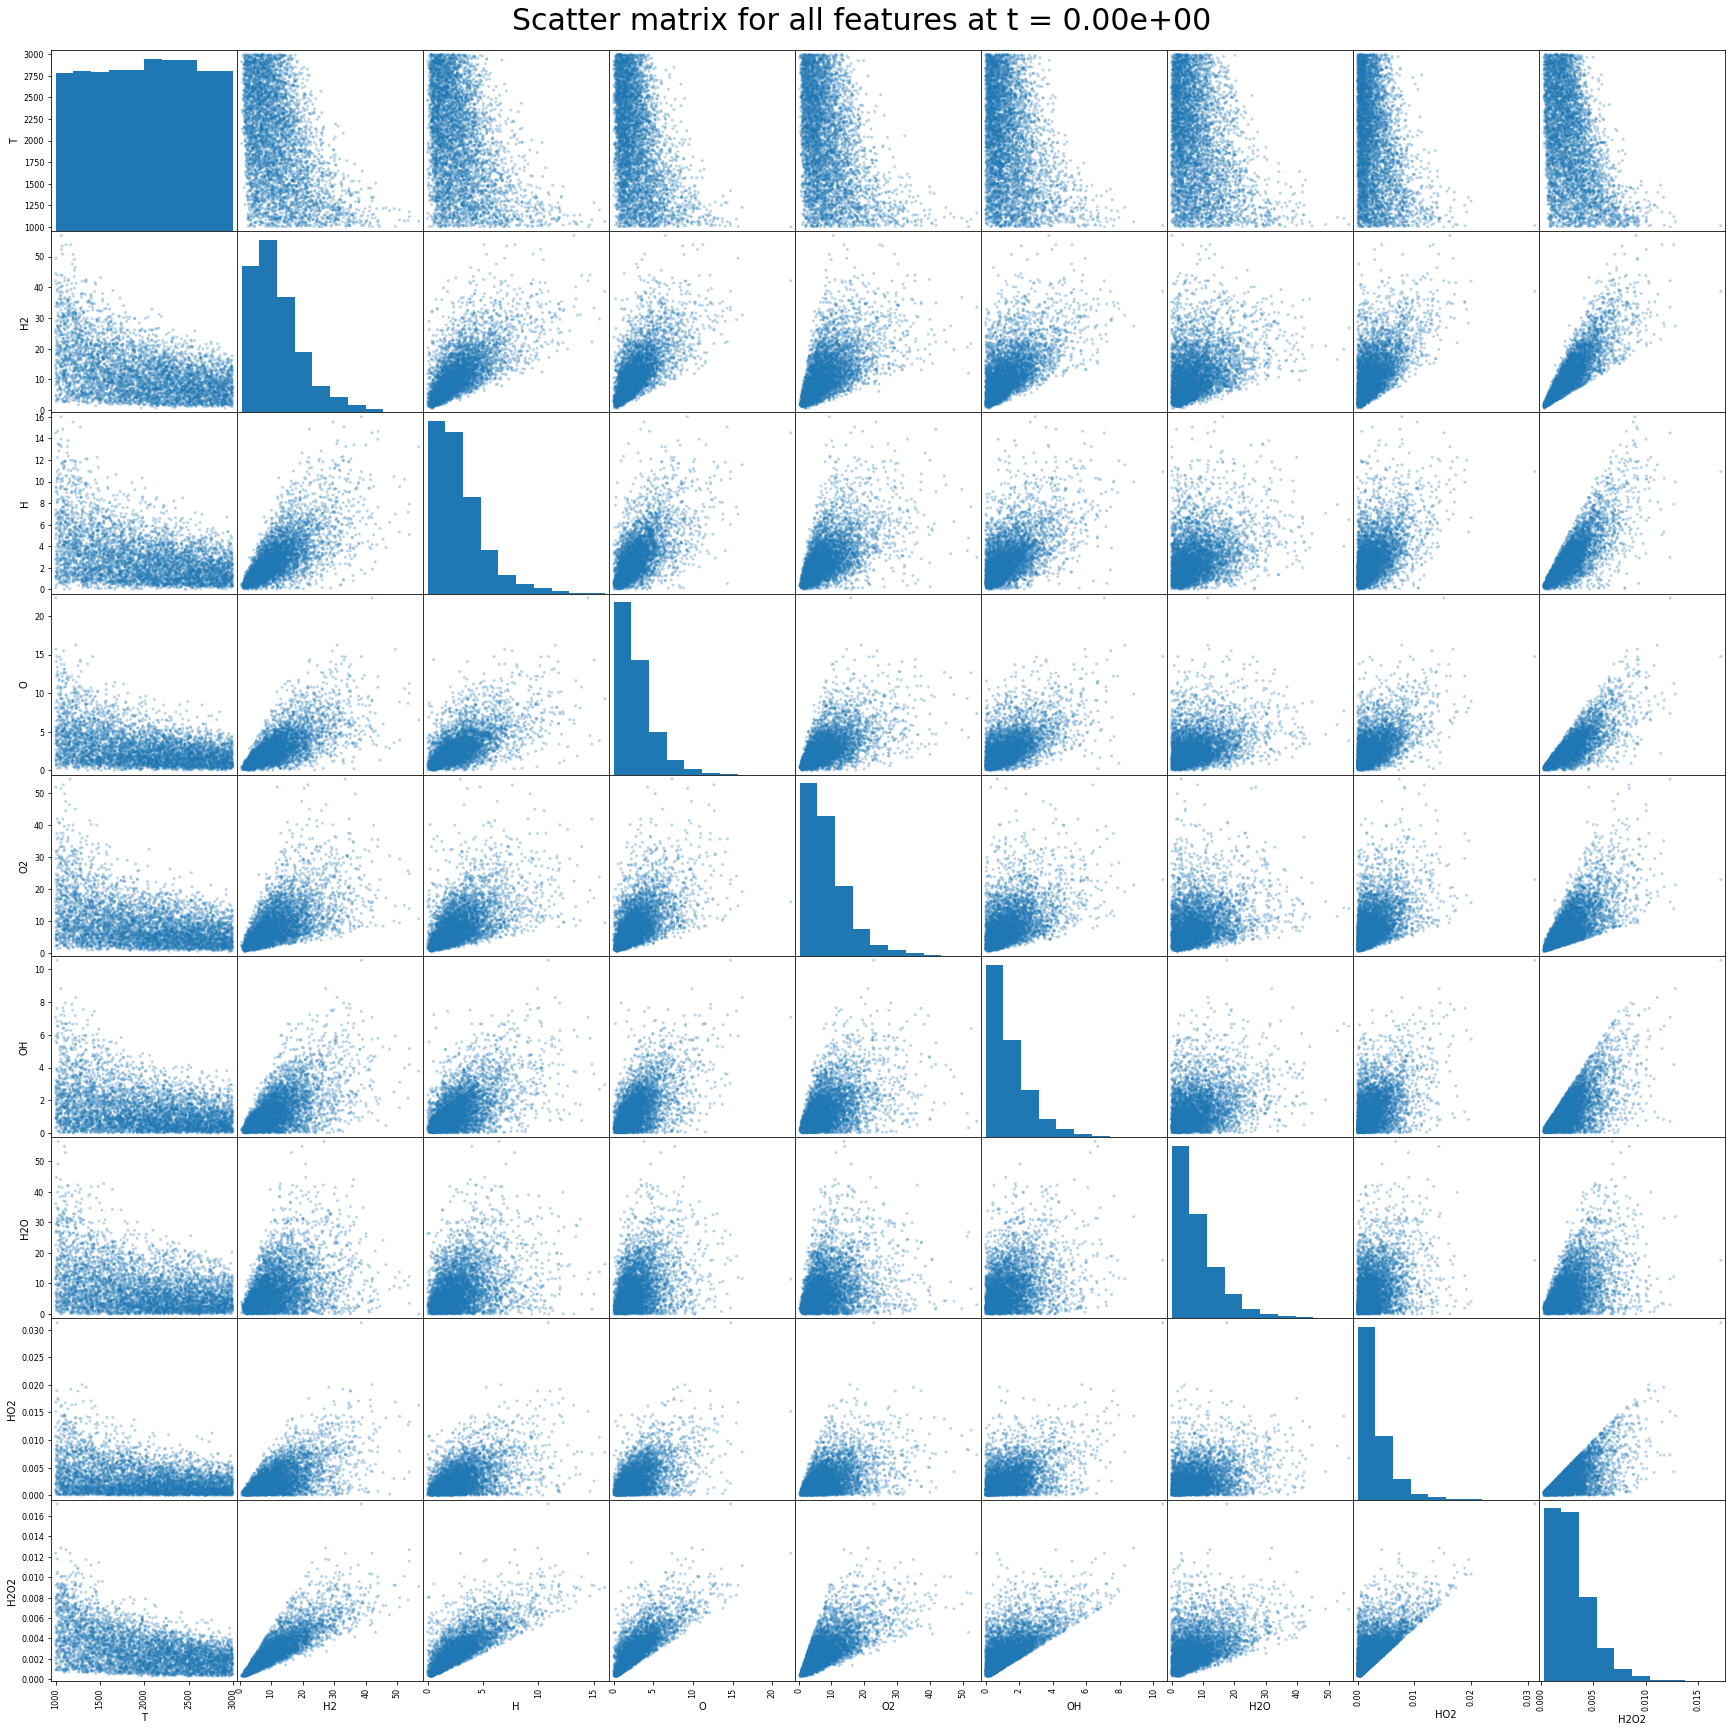

In [147]:
show_scatter_time()

#### Cross plot across all concentration and temperature at final time.

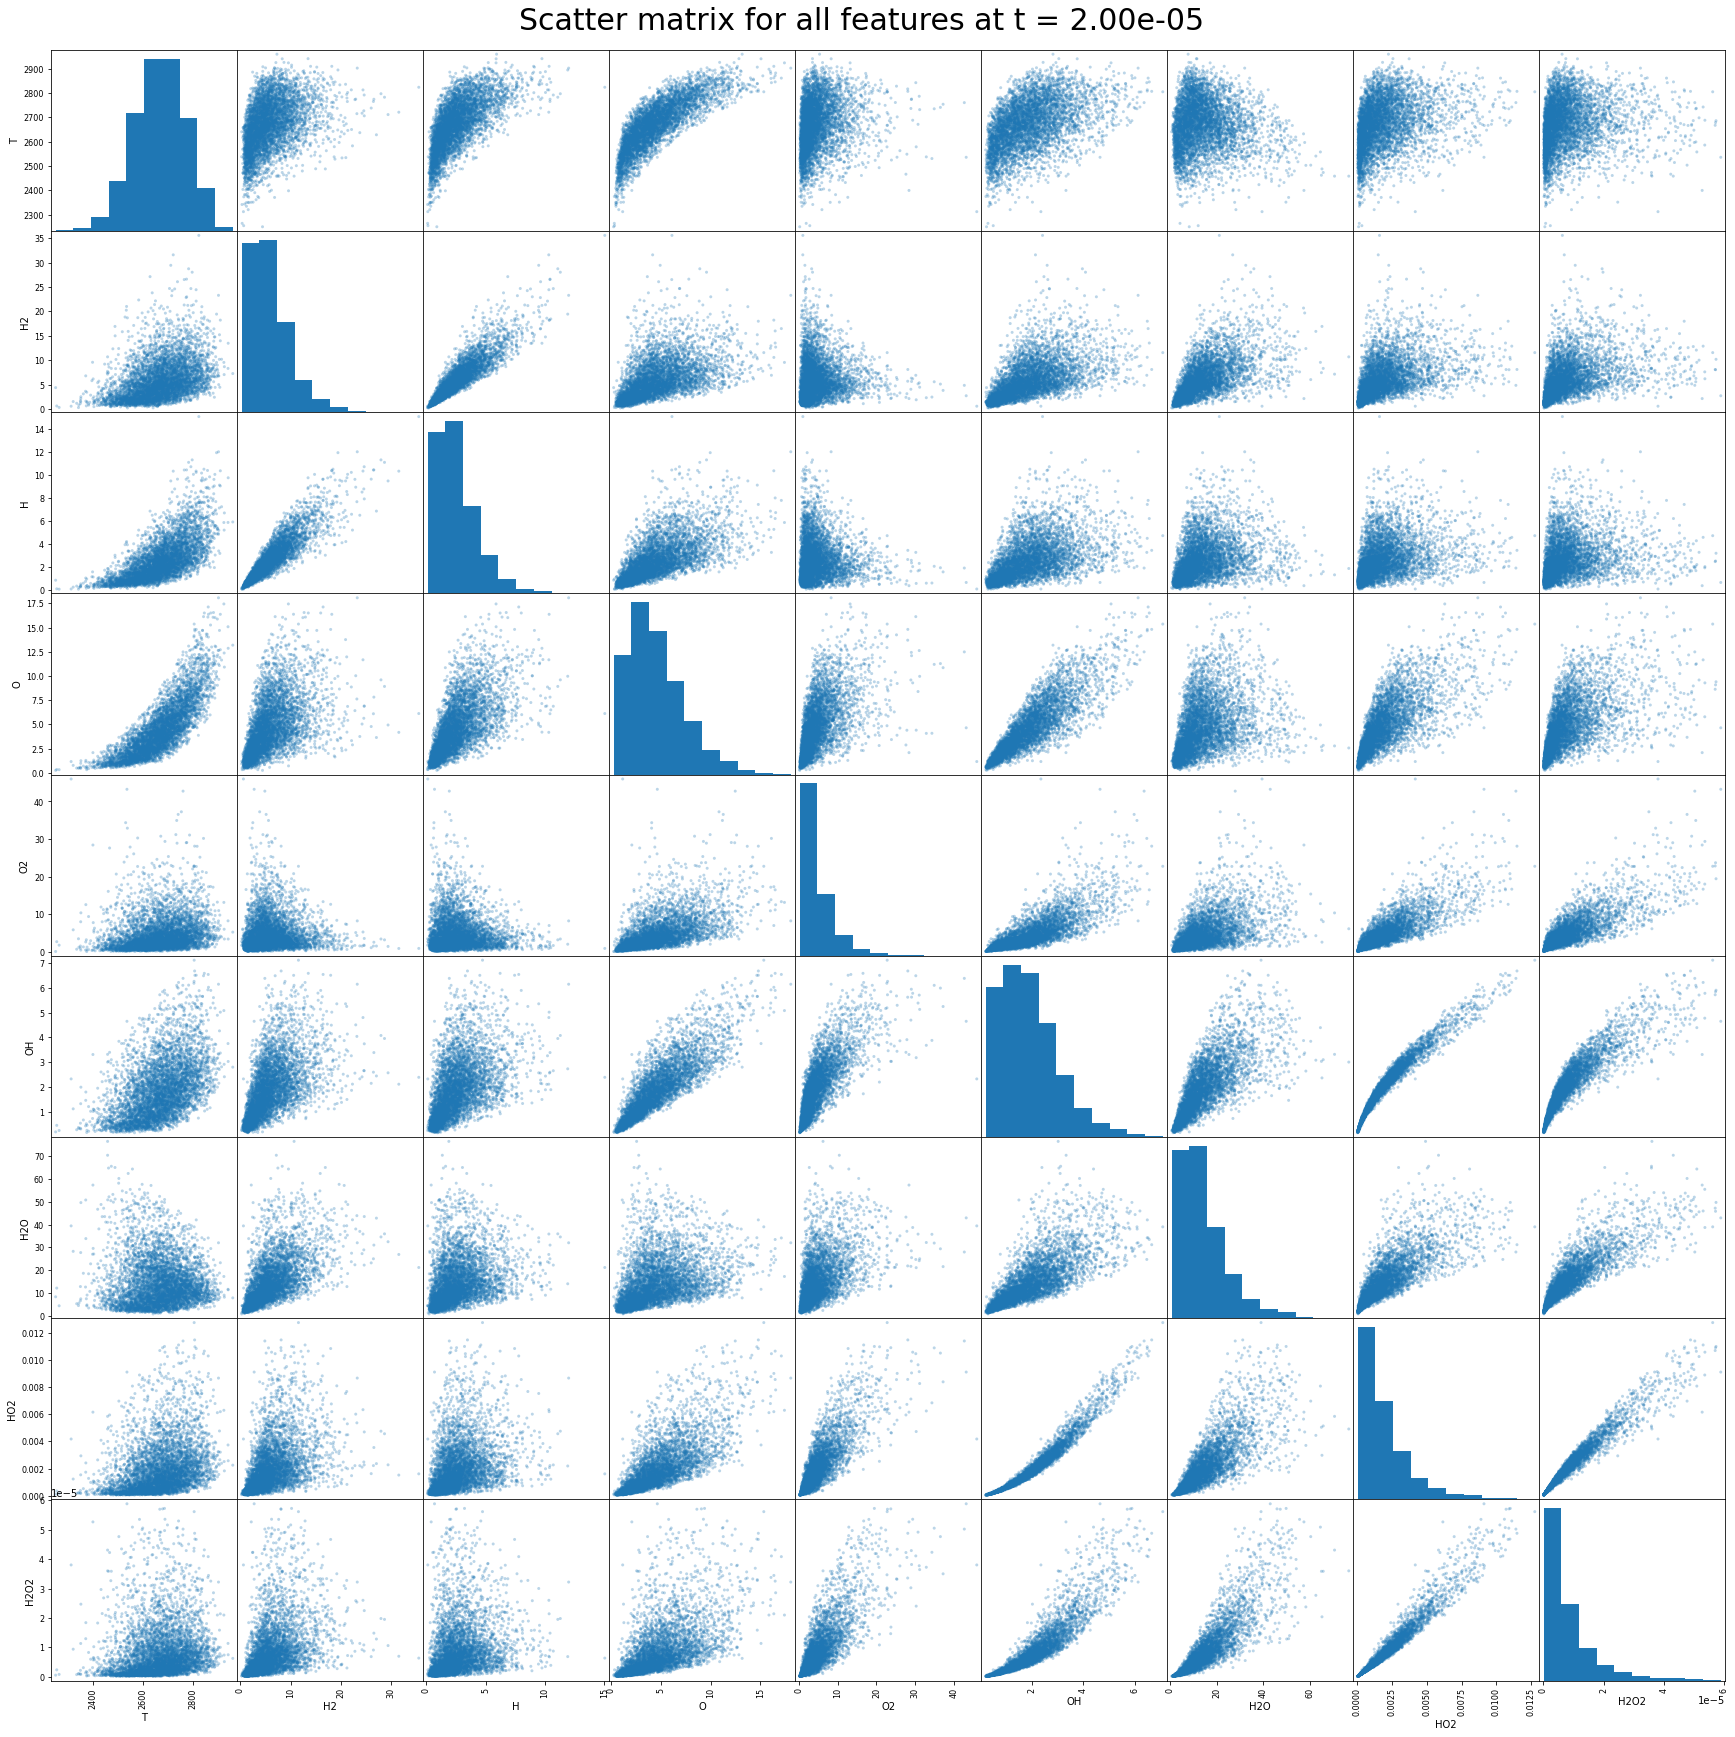

In [148]:
show_scatter_time(time = -1)

#### Seems to be a noticable linear dependence among OH, HO2, and H2O2. 

A closer look in next cells

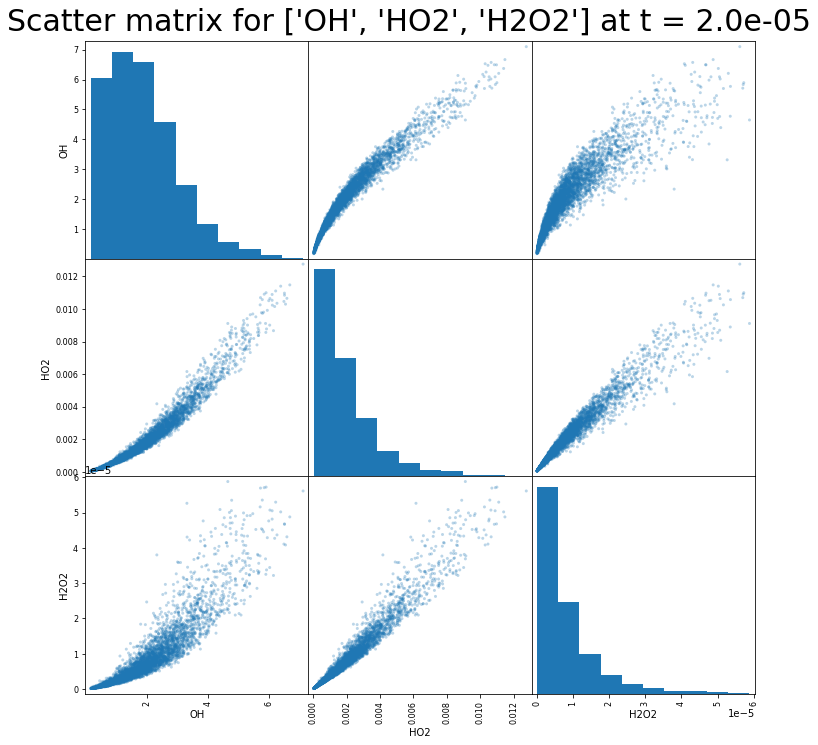

In [152]:
show_scatter_time([5, 7, 8], -1) 

#### H2 vs H??

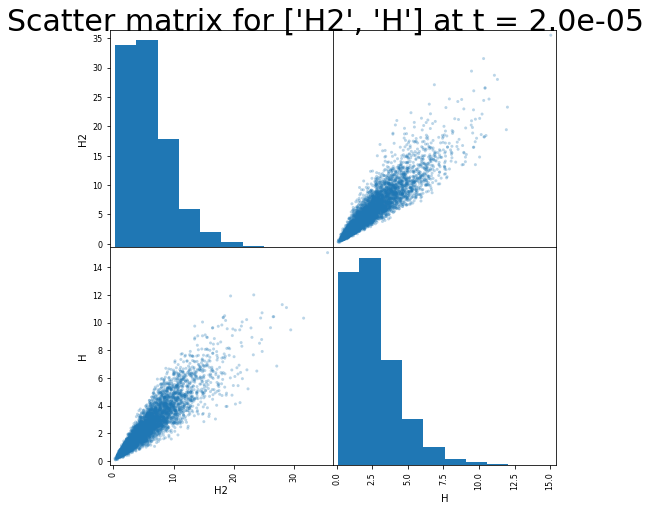

In [153]:
show_scatter_time([1,2], -1) 

#### Can observe any dependencies among 'oxygen' components???

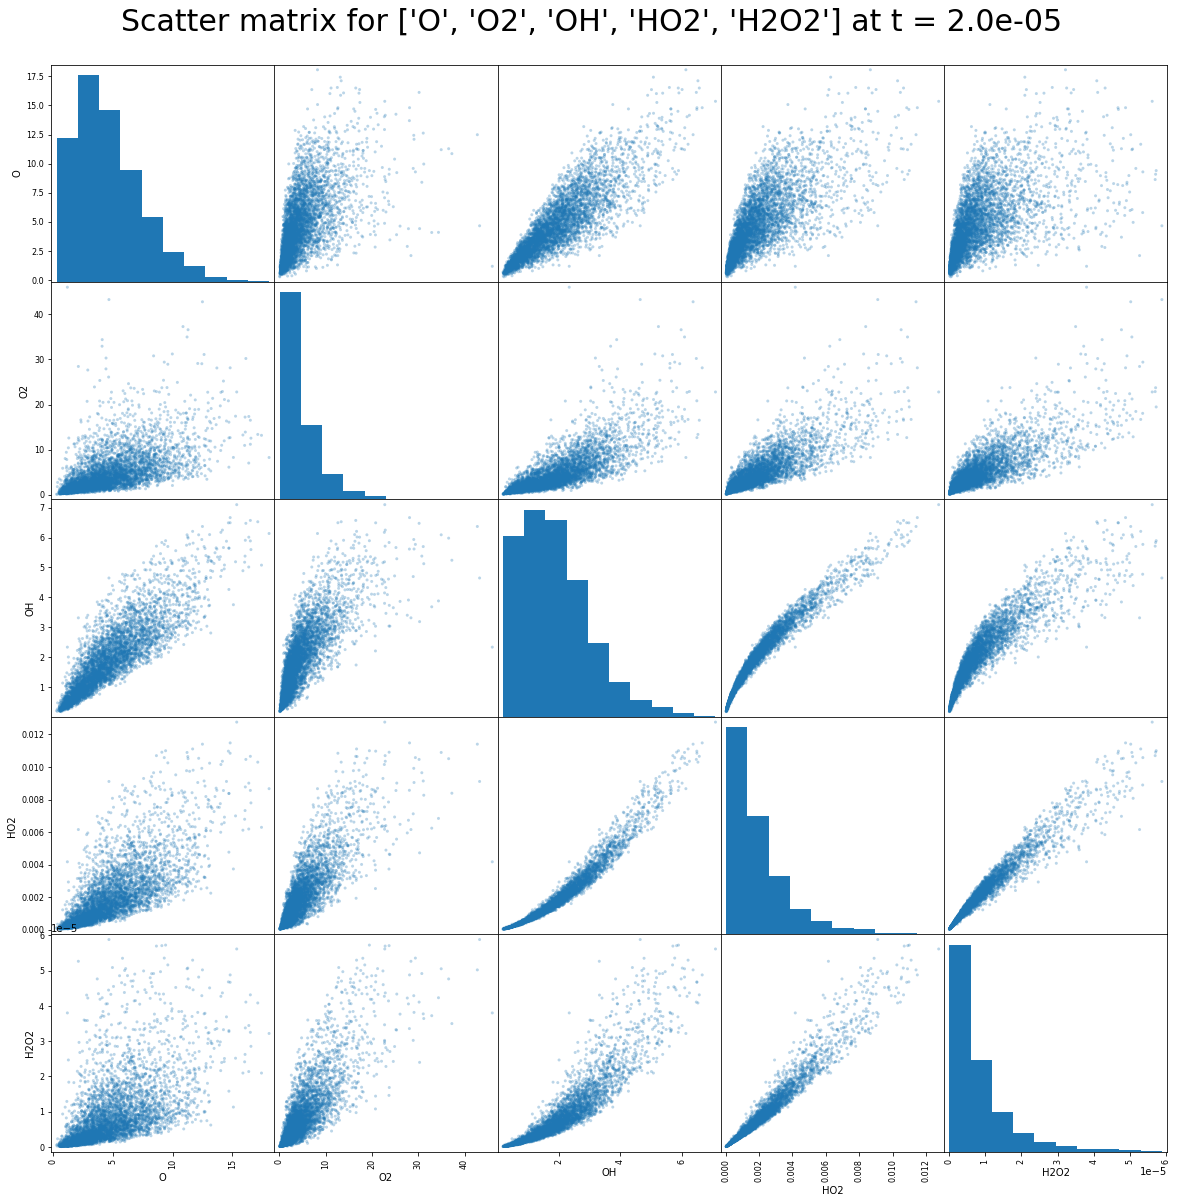

In [154]:
show_scatter_time([3,4,5, 7, 8], -1) 